In [1]:
!pip install tensorflow numpy


In [2]:
  import tensorflow as tf

url = "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt"
path = tf.keras.utils.get_file("shakespeare.txt", url)

path


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


'/root/.keras/datasets/shakespeare.txt'

In [3]:
import string

with open(path, 'r', encoding='utf-8') as f:
    text = f.read().lower()

text = text.translate(str.maketrans('', '', string.punctuation))

print("Total characters:", len(text))
print(text[:500])


Total characters: 1060997
first citizen
before we proceed any further hear me speak

all
speak speak

first citizen
you are all resolved rather to die than to famish

all
resolved resolved

first citizen
first you know caius marcius is chief enemy to the people

all
we knowt we knowt

first citizen
let us kill him and well have corn at our own price
ist a verdict

all
no more talking ont let it be done away away

second citizen
one word good citizens

first citizen
we are accounted poor citizens the patricians good
what 


In [4]:
import numpy as np

chars = sorted(list(set(text)))
vocab_size = len(chars)

char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

print("Vocabulary size:", vocab_size)


Vocabulary size: 29


In [5]:
SEQ_LEN = 40

sequences = []
targets = []

for i in range(len(text) - SEQ_LEN):
    sequences.append([char_to_idx[c] for c in text[i:i+SEQ_LEN]])
    targets.append(char_to_idx[text[i+SEQ_LEN]])

X = np.array(sequences)
y = np.array(targets)

print("Input shape:", X.shape)
print("Target shape:", y.shape)


Input shape: (1060957, 40)
Target shape: (1060957,)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(vocab_size, 128, input_length=SEQ_LEN),
    LSTM(256),
    Dense(vocab_size, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X, y,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 70s 9ms/step - loss: 1.9443 - val_loss: 1.5784
Epoch 2/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 67s 9ms/step - loss: 1.3969 - val_loss: 1.5108
Epoch 3/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - loss: 1.3228 - val_loss: 1.4784
Epoch 4/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - loss: 1.2839 - val_loss: 1.4669
Epoch 5/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 1.2541 - val_loss: 1.4680
Epoch 6/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - loss: 1.2390 - val_loss: 1.4634
Epoch 7/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - loss: 1.2247 - val_loss: 1.4655
Epoch 8/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - loss: 1.2107 - val_loss: 1.4671
Epoch 9/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 1.1989 - val_loss: 1.4547
Epoch 10/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - loss: 1.1919 - val_loss: 1.4689
Epoch 11/20
7460/7460 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - loss: 1.1847 - val_loss: 1.4648
Epoch 12/20
7460/74

In [8]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Loss: 1.1876
Final Validation Loss: 1.4661


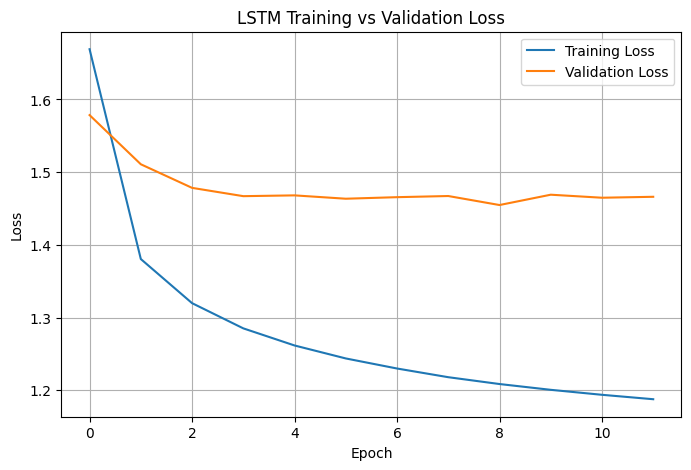

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
loss = model.evaluate(X[:5000], y[:5000], verbose=0)
print(f"Evaluation Loss on sample data: {loss:.4f}")


Evaluation Loss on sample data: 1.1932


In [11]:
import math

perplexity = math.exp(loss)
print(f"Model Perplexity: {perplexity:.2f}")


Model Perplexity: 3.30


In [16]:
### Upgradation


In [27]:
model.save("lstm_text_generator.h5")


In [13]:
import numpy as np

def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(preds), p=preds)


In [19]:
def generate_text_temp(seed, length=300, temperature=0.8):
    seed = seed.lower()
    generated = seed

    for _ in range(length):
        seq = [char_to_idx.get(c, 0) for c in seed]
        seq = np.array(seq).reshape(1, -1)

        preds = model.predict(seq, verbose=0)[0]
        next_idx = sample_with_temperature(preds, temperature)
        next_char = idx_to_char[next_idx]

        generated += next_char
        seed = seed[1:] + next_char

    return generated


In [20]:
print("Temperature = 0.5 (more conservative)\n")
print(generate_text_temp("to be or not to be that ", 300, temperature=0.5))

print("\nTemperature = 0.8 (balanced)\n")
print(generate_text_temp("to be or not to be that ", 300, temperature=0.8))

print("\nTemperature = 1.2 (creative)\n")
print(generate_text_temp("to be or not to be that ", 300, temperature=1.2))


Temperature = 0.5 (more conservative)

to be or not to be that stands
thereof i am the nothing hand
what will be so hear me but they
shall sting the world with him to meet
that was he should i may

first servingman
ay the precious suitor
till the people have i richard
it not best may have with him

buckingham
go to the state as they
that i should be married
and

Temperature = 0.8 (balanced)

to be or not to be that that
here that they should take his life

duke of york
he shall be feeling like
all the rage of her sad stretches with you
that she were such desceed

balthasar
my lord with heart up i am in
the hand if i am so hence
but your chury can i am here
could not sigh that hear me
the rather you are like me

Temperature = 1.2 (creative)

to be or not to be that ove
this sake behold like told times
gently of their child us

juliet
ha the montague for love away
3 henry grieving hundred
which bawdy of dews in heed

mifticito
you canon tis now there is so longed
contented smaly isabed
s

In [17]:
with open("final_generated_text.txt", "w") as f:
    f.write("Seed: to be or not to be that\n")
    f.write("Temperature: 0.8\n\n")
    f.write(generate_text_temp("to be or not to be that ", 400, temperature=0.8))


In [18]:
print(generate_text("my lord the king ", 300))
print(generate_text("love is a fire ", 300))


my lord the king is not
the sharper shall be

romeo
and so i see the strangers
that i may speak to him

buckingham
my lord i will not
be so i will not speak

king richard ii

buckingham
my lord i will not
be so i will not speak

king richard ii

buckingham
my lord i will not
be so i will not speak

king richard ii


love is a fire of his
so shall be so do

buckingham
my lord i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so i will not
be so 


In [22]:
import numpy as np

# Take a subset to avoid memory issues
SAMPLE_SIZE = 5000

X_sample = X[:SAMPLE_SIZE]
y_sample = y[:SAMPLE_SIZE]

# Get model predictions
y_pred_probs = model.predict(X_sample, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Token-level accuracy
accuracy = np.mean(y_pred == y_sample)

print(f"Token-Level Accuracy: {accuracy * 100:.2f}%")


Token-Level Accuracy: 60.72%


In [23]:
def top_k_accuracy(y_true, y_pred_probs, k=5):
    top_k_preds = np.argsort(y_pred_probs, axis=1)[:, -k:]
    correct = [y_true[i] in top_k_preds[i] for i in range(len(y_true))]
    return np.mean(correct)

top5_acc = top_k_accuracy(y_sample, y_pred_probs, k=5)
top10_acc = top_k_accuracy(y_sample, y_pred_probs, k=10)

print(f"Top-5 Accuracy: {top5_acc * 100:.2f}%")
print(f"Top-10 Accuracy: {top10_acc * 100:.2f}%")


Top-5 Accuracy: 88.66%
Top-10 Accuracy: 95.80%


In [24]:
from collections import Counter

errors = y_sample[y_pred != y_sample]
error_chars = [idx_to_char[i] for i in errors]

error_counts = Counter(error_chars)
error_counts.most_common(10)


[('a', 180),
 ('i', 153),
 ('e', 143),
 ('t', 124),
 ('s', 118),
 ('o', 105),
 (' ', 100),
 ('n', 99),
 ('r', 92),
 ('l', 84)]

### AD-hoc


In [26]:
# # ============================================================
# # PART 1: IMPORTS & SETUP
# # ============================================================

# import tensorflow as tf
# import numpy as np
# import string
# import math
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import matplotlib.pyplot as plt


# # ============================================================
# # PART 2: DATA DOWNLOAD & PREPROCESSING
# # ============================================================

# # Download Shakespeare dataset (official TensorFlow source)
# url = "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt"
# path = tf.keras.utils.get_file("shakespeare.txt", url)

# # Load and clean text
# with open(path, 'r', encoding='utf-8') as f:
#     text = f.read().lower()

# text = text.translate(str.maketrans('', '', string.punctuation))

# # Character vocabulary
# chars = sorted(list(set(text)))
# vocab_size = len(chars)

# char_to_idx = {c: i for i, c in enumerate(chars)}
# idx_to_char = {i: c for c, i in char_to_idx.items()}


# # ============================================================
# # PART 3: SEQUENCE CREATION
# # ============================================================

# SEQ_LEN = 60   # Increased context window

# sequences = []
# targets = []

# for i in range(len(text) - SEQ_LEN):
#     sequences.append([char_to_idx[c] for c in text[i:i+SEQ_LEN]])
#     targets.append(char_to_idx[text[i+SEQ_LEN]])

# X = np.array(sequences)
# y = np.array(targets)

# print("Input shape:", X.shape)
# print("Target shape:", y.shape)


# # ============================================================
# # PART 4: MODEL ARCHITECTURE (IMPROVED LSTM)
# # ============================================================

# model = Sequential([
#     Embedding(vocab_size, 128, input_length=SEQ_LEN),

#     Bidirectional(
#         LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)
#     ),

#     LSTM(256, dropout=0.2, recurrent_dropout=0.2),

#     Dense(vocab_size, activation='softmax')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy'
# )

# model.summary()


# # ============================================================
# # PART 5: MODEL TRAINING
# # ============================================================

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=4,
#     restore_best_weights=True
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=2,
#     min_lr=1e-5
# )

# history = model.fit(
#     X, y,
#     batch_size=128,
#     epochs=30,
#     validation_split=0.1,
#     callbacks=[early_stop, reduce_lr]
# )


# # ============================================================
# # PART 6: PERFORMANCE METRICS
# # ============================================================

# # Token-level accuracy
# sample_size = 5000
# X_sample = X[:sample_size]
# y_sample = y[:sample_size]

# y_pred_probs = model.predict(X_sample, verbose=0)
# y_pred = np.argmax(y_pred_probs, axis=1)

# token_accuracy = np.mean(y_pred == y_sample)
# print(f"Token-Level Accuracy: {token_accuracy * 100:.2f}%")

# # Top-K accuracy
# def top_k_accuracy(y_true, y_probs, k=5):
#     top_k = np.argsort(y_probs, axis=1)[:, -k:]
#     return np.mean([y_true[i] in top_k[i] for i in range(len(y_true))])

# print(f"Top-5 Accuracy: {top_k_accuracy(y_sample, y_pred_probs, 5) * 100:.2f}%")
# print(f"Top-10 Accuracy: {top_k_accuracy(y_sample, y_pred_probs, 10) * 100:.2f}%")


# # ============================================================
# # PART 7: LOSS CURVE VISUALIZATION
# # ============================================================

# plt.figure(figsize=(8, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training vs Validation Loss')
# plt.legend()
# plt.grid(True)
# plt.show()


# # ============================================================
# # PART 8: ADVANCED SAMPLING (TOP-K + TEMPERATURE)
# # ============================================================

# def sample_top_k(preds, k=5, temperature=0.7):
#     preds = np.asarray(preds).astype("float64")
#     preds = np.log(preds + 1e-8) / temperature

#     top_k_indices = np.argsort(preds)[-k:]
#     top_k_preds = preds[top_k_indices]

#     exp_preds = np.exp(top_k_preds)
#     probs = exp_preds / np.sum(exp_preds)

#     return np.random.choice(top_k_indices, p=probs)


# def generate_text(seed, length=400, temperature=0.7, top_k=5):
#     seed = seed.lower()
#     generated = seed

#     for _ in range(length):
#         seq = [char_to_idx.get(c, 0) for c in seed]
#         seq = np.array(seq).reshape(1, -1)

#         preds = model.predict(seq, verbose=0)[0]
#         next_idx = sample_top_k(preds, k=top_k, temperature=temperature)
#         next_char = idx_to_char[next_idx]

#         generated += next_char
#         seed = seed[1:] + next_char

#     return generated


# # ============================================================
# # PART 9: TEXT GENERATION (FINAL OUTPUT)
# # ============================================================

# print("\nGenerated Text Sample:\n")
# print(generate_text(
#     seed="to be or not to be that ",
#     length=400,
#     temperature=0.7,
#     top_k=5
# ))


# # ============================================================
# # PART 10: SAVE MODEL & OUTPUTS
# # ============================================================

# model.save("improved_lstm_text_generator.h5")

# with open("final_generated_text.txt", "w") as f:
#     f.write(generate_text("to be or not to be that ", 400, 0.7, 5))

# print("\nModel and outputs saved successfully.")
